In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat

# Exercise 7.1: K-Means Clustering (dimension-2, category-3)
---

So far with classification problems we have had labelled training data, and have sought the boundary surface that best separates the different categories. We have done this with single logistic regression, multiple logistic regression wrapped up as a one-versus-all classifier, neural networks, and support vector machines. Now we begin to consider how we may categorise data if we don't have any labelled training data, but just know the number of categories. Problems with labelled training data are referred to as "_supervised learning_" problems, and those without labelled training data are referred to as "_unsupervised learning_" problems.

One such unsupervised learning technique is "_k-means clustering_". We have data points distributed in data-space, and we specify a set number of categories which the algorithm must best group the data points into. The algorithm must determine the best locations in data-space to put points that represent "_mean_" or "_centroid_" points, then the data points themselves are labelled by whichever such mean point they are closest to. At first the mean points are cast at random, often being a selection of the data points themselves. All data points are then labelled by whichever mean they are closest to, and the mean points of those groups of points are then taken as the next iteration of the mean points we are trying to find. We reiterate, and the mean points tend to shift again, and so on, until some termination condition is met.

Let's have a look with some 2D data that visually appears to have three distinct clusters:

In [2]:
d1 = loadmat('ex7/ex7data2.mat')
d1.keys()
# dict_keys(['__header__', '__version__', '__globals__', 'X'])

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
d1_X = d1['X']
d1_X.shape
# (300, 2)

(300, 2)

In [4]:
del(d1)

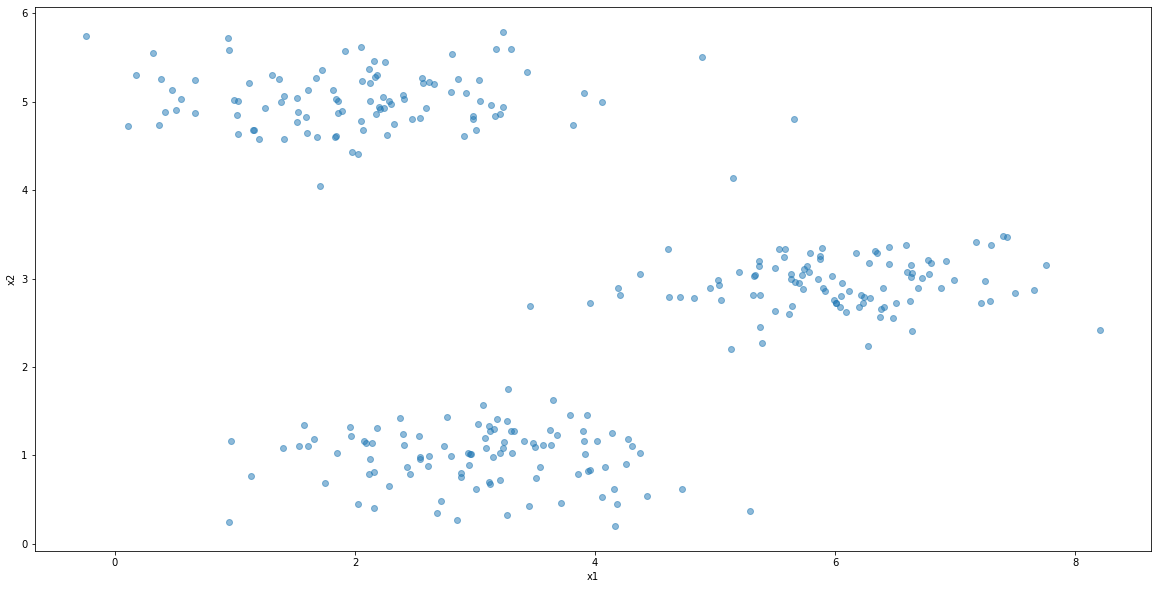

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.scatter(d1_X[:,0], d1_X[:,1], color='C0', alpha=0.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

We base the algorithm on the following two functions, one of which finds the centroid index which is closest to each data point, and the other of which finds the centroid based on a group of like-labelled data points at any one stage in the process. Let's define and test:

In [6]:
def get_centroids_idxs_closest(
    X,
    centroids,
):

    X_centroids_dists_squared = np.transpose(np.array([
        np.sum(
            np.power((X - centroid), 2),
            axis=1,
        )
        for centroid in centroids
    ]))

    centroids_idxs_closest = np.argmin(
        X_centroids_dists_squared,
        axis=1,
    )

    return(centroids_idxs_closest)

In [7]:
def get_centroids(
    X,
    centroids_idxs_closest,
    centroids_num,
):

    centroids = np.array([
        np.mean(
            X[np.where(centroids_idxs_closest == centroids_idx)],
            axis=0,
        )
        for centroids_idx in range(centroids_num)
    ])

    return(centroids)

In [8]:
get_centroids_idxs_closest(d1_X, [[1,1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
get_centroids_idxs_closest(d1_X, [[1,1], [2,2]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

---

Now let's just run through one iteration of the algorithm step-by-step for illustration, then we'll wrap it up in a function afterwards. For the data in hand, let's arbitrarily set three starting centroid locations, then determine the closest one for each data point, then determine a new set of centroid locations from the mean of the points assigned to each cluster:

In [10]:
d1_X_centroids_start = [[3,3], [6,2], [8,5]]
d1_X_centroids_iters = np.array([d1_X_centroids_start])

In [11]:
d1_X_centroids_idxs_closest = get_centroids_idxs_closest(d1_X, d1_X_centroids_iters[-1])
d1_X_centroids_idxs_closest[0:3]
# array([0, 2, 1])

array([0, 2, 1])

In [12]:
d1_X_centroids_iter = get_centroids(d1_X, d1_X_centroids_idxs_closest, len(d1_X_centroids_start))
d1_X_centroids_iter
# array([[2.42830111, 3.15792418],
#        [5.81350331, 2.63365645],
#        [7.11938687, 3.6166844 ]])

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [13]:
d1_X_centroids_iters = np.append(d1_X_centroids_iters, [d1_X_centroids_iter], axis=0)

Plot the data, with colouring given by the cluster assignation with respect to the penultimate set of cluster centroids (just the set of starting centroids in the first instance here):

In [20]:
def plot_centroid_path(
    X,
    centroids_idxs_closest,
    centroids_iters,
):

    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    legend = []

    for centroids_idx in range(len(centroids_iters[0])):
        exs_idxs_centroid = np.where(centroids_idxs_closest == centroids_idx)
        color = f'C{centroids_idx}'
        ax.plot(
            centroids_iters[0][centroids_idx][0],
            centroids_iters[0][centroids_idx][1],
            'o',
            color=color,
            markersize=10,
            fillstyle='none',
        )
        ax.plot(
            centroids_iters.transpose()[0][centroids_idx],
            centroids_iters.transpose()[1][centroids_idx],
            '+-',
            color=color,
            markersize=20,
        )
        legend += [f'cent-{centroids_idx}-start', f'cent-{centroids_idx}-path']

    for centroids_idx in range(len(centroids_iters[0])):
        exs_idxs_centroid = np.where(centroids_idxs_closest == centroids_idx)
        color = f'C{centroids_idx}'
        ax.scatter(
            X[:,0][exs_idxs_centroid],
            X[:,1][exs_idxs_centroid],
            color=color,
            alpha=0.5,
        )
        legend += [f'cat-{centroids_idx}']

    ax.set(xlabel='x1', ylabel='x2')
    ax.legend(legend)
    plt.show()

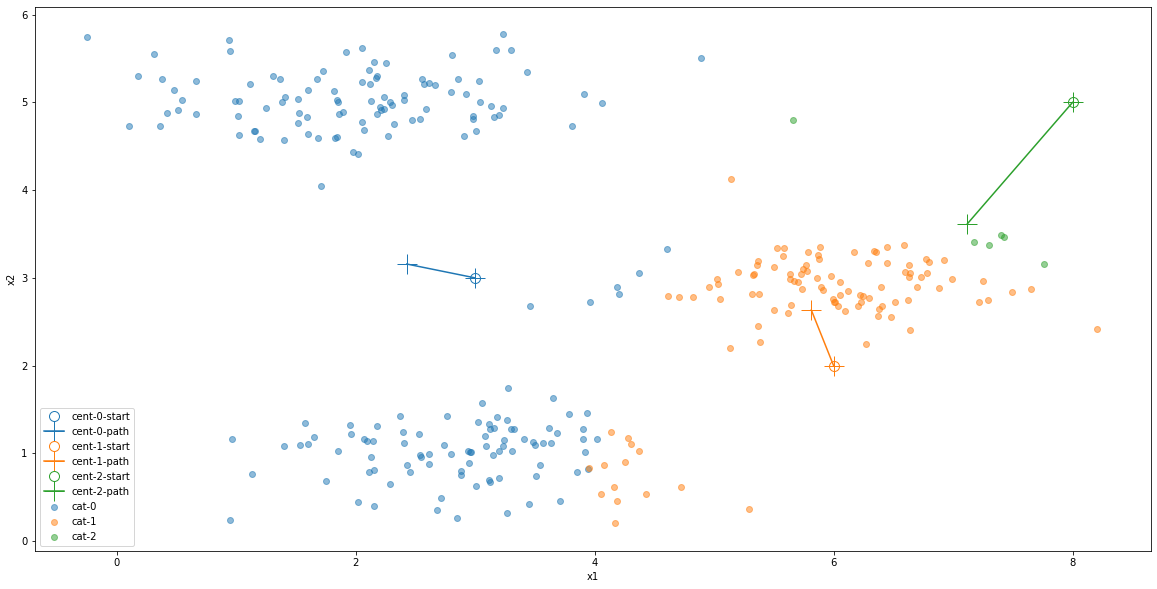

In [21]:
plot_centroid_path(d1_X, d1_X_centroids_idxs_closest, d1_X_centroids_iters)

---

Now do the same again but with everything wrapped up in a looping function that terminates after a set number of iterations. We see that the cluster centroids drift towards the expected locations, and the data are then well categorised (remember that colouring is given by the cluster assignation with respect to the penultimate set of cluster centroids):

In [22]:
def kmeans(
    X,
    centroids_start,
    iters_num,
):

    centroids_iters = np.array([centroids_start])

    for _ in range(iters_num):
        centroids_idxs_closest = get_centroids_idxs_closest(X, centroids_iters[-1])
        centroids_iter = get_centroids(X, centroids_idxs_closest, len(centroids_start))
        centroids_iters = np.append(centroids_iters, [centroids_iter], axis=0)

    return(centroids_idxs_closest, centroids_iters)

In [23]:
d1_X_centroids_idxs_closest, d1_X_centroids_iters = kmeans(d1_X, d1_X_centroids_start, 10)

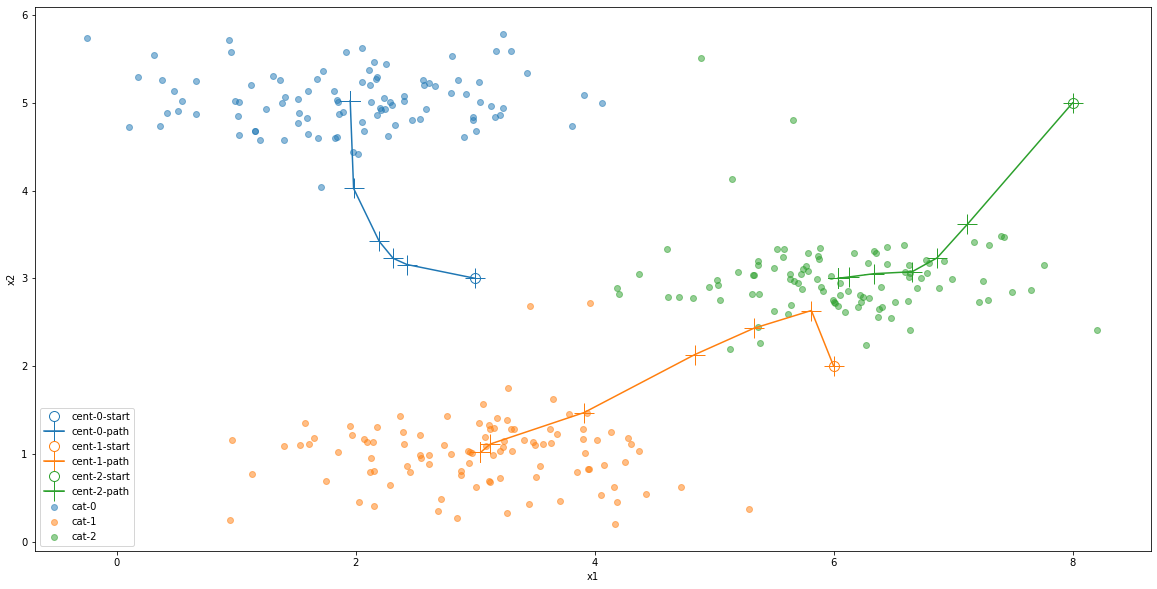

In [24]:
plot_centroid_path(d1_X, d1_X_centroids_idxs_closest, d1_X_centroids_iters)

# Exercise 7.1: K-Means Clustering (dimension-3, category-16)
---

So we've seen k-means clustering on 2D data, now let's try data with more dimensions. With an RGB image, each pixel can be taken as an example data point in a 3D RGB colour-space. Let's see an example:

In [110]:
im1_X = mpimg.imread('ex7/bird_small.png')
im1_X.shape
# (128, 128, 3)

(128, 128, 3)

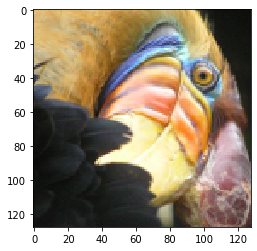

In [23]:
plt.imshow(im1_X)
plt.show()

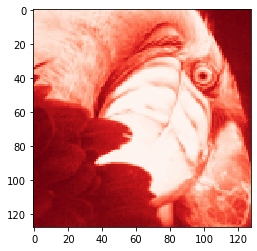

In [24]:
plt.imshow(im1_X[:,:,0], cmap='Reds_r')
plt.show()

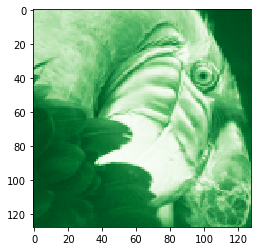

In [25]:
plt.imshow(im1_X[:,:,1], cmap='Greens_r')
plt.show()

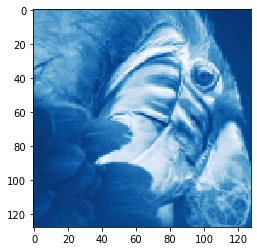

In [26]:
plt.imshow(im1_X[:,:,2], cmap='Blues_r')
plt.show()

In [27]:
im1_X_reshape = im1_X.reshape([im1_X.shape[0] * im1_X.shape[1], 3])
im1_X_reshape.shape
# (16384, 3)

(16384, 3)

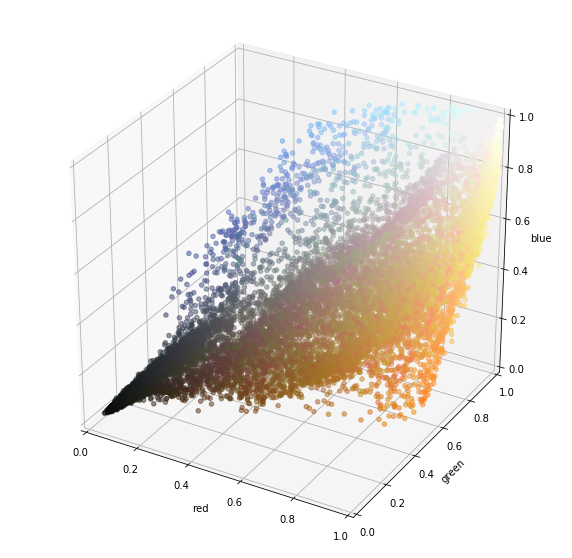

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(im1_X_reshape[:,0], im1_X_reshape[:,1], im1_X_reshape[:,2], color=im1_X_reshape, alpha=0.5)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

---

Unlike the 2D example from before, in this 3D example there are no clear clusters. However, we can still run the k-means clustering algorithm regardless, for any number of clusters we like. In the case of RGB image data, a determined set of k centroids relates to a set of RGB colours, and the data points (the pixels) can be assigned to each of these centroids and given its colour in order to compress the image to a subset of the full range of colour possibilities. Instead of three values per pixel, we then only need to store one value, namely the assigned cluster index, and a separate lookup table of a full RGB triplet for each cluster centroid.

Starting centroids can be chosen as actual data points, with example indices (i.e. data point indices) found as follows, where we have chosen to seek 16 centroids:

In [161]:
im1_X_reshape_exs_num = im1_X_reshape.shape[0]
im1_X_reshape_centroids_num = 16
im1_X_reshape_exs_idxs_centroids_start = np.random.choice(im1_X_reshape_exs_num, im1_X_reshape_centroids_num, replace=False)
im1_X_reshape_centroids_start = im1_X_reshape[im1_X_reshape_exs_idxs_centroids_start]
print(im1_X_reshape_centroids_start)

[[0.58431375 0.49019608 0.3254902 ]
 [0.63529414 0.5254902  0.23921569]
 [0.09019608 0.09019608 0.08627451]
 [0.99607843 0.96862745 0.7764706 ]
 [0.78039217 0.6862745  0.39607844]
 [0.88235295 0.77254903 0.49411765]
 [0.79607844 0.64705884 0.4117647 ]
 [0.09019608 0.09411765 0.07843138]
 [0.07058824 0.08235294 0.07058824]
 [0.89411765 0.83137256 0.6039216 ]
 [0.15294118 0.16078432 0.15294118]
 [0.654902   0.5529412  0.3764706 ]
 [0.9882353  0.9411765  0.59607846]
 [0.77254903 0.5176471  0.23137255]
 [0.84313726 0.7294118  0.49411765]
 [0.99607843 0.65882355 0.5568628 ]]


We can run the exact same k-means function as for the 2D data:

In [30]:
im1_X_reshape_centroids_idxs_closest, im1_X_reshape_centroids_iters = kmeans(im1_X_reshape, im1_X_reshape_centroids_start, 10)

Unlike in the 2D example, where we left the data point assignations in the plot (i.e. the colouring) as those which gave the final centroids, let's go one step further here and use the final centroids to determine the final data point assignation for display purposes:

In [31]:
im1_X_reshape_centroids_idxs_closest = get_centroids_idxs_closest(im1_X_reshape, im1_X_reshape_centroids_iters[-1])

This is essentially the compressed data i.e. one value per point. Using the final centroids as a lookup table for the only full RGB triplets to be used in the compressed image, we then seek which one relates to which pixel and reconstitute the image as follows:

In [32]:
im1_X_reshape_lowres = im1_X_reshape_centroids_iters[-1][im1_X_reshape_centroids_idxs_closest]
im1_X_reshape_lowres.shape
# (16384, 3)

(16384, 3)

In [33]:
im1_X_lowres = im1_X_reshape_lowres.reshape([im1_X.shape[0], im1_X.shape[1], 3])
im1_X_lowres.shape
# (128, 128, 3)

(128, 128, 3)

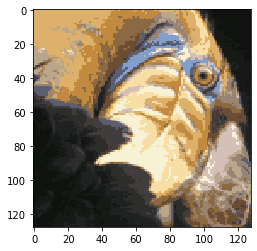

In [34]:
plt.imshow(im1_X_lowres)
plt.show()

---

Finally, we can also plot the pixel data in 3D RGB colour-space again, but this time with the data points coloured by the cluster centroid they are assigned to:

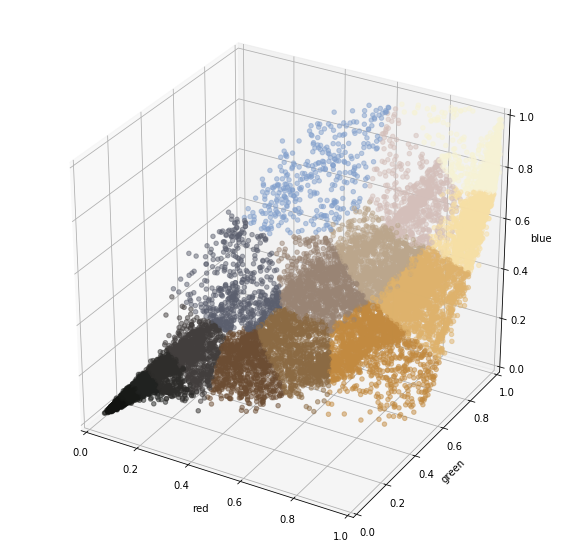

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(im1_X_reshape[:,0], im1_X_reshape[:,1], im1_X_reshape[:,2], color=im1_X_reshape_lowres, alpha=0.5)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

And let's also just see the centroids themselves:

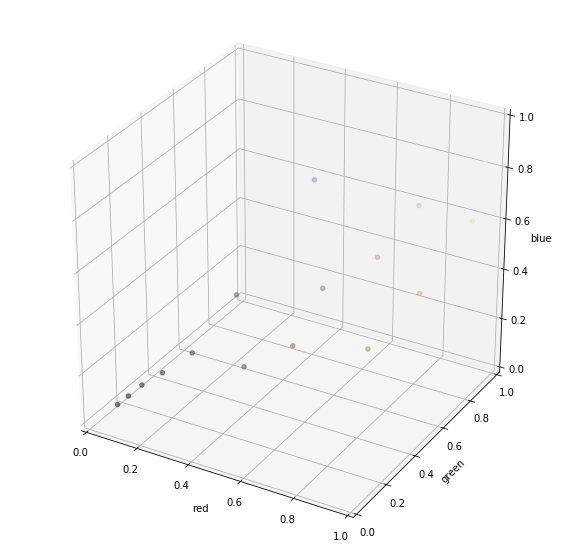

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(im1_X_reshape_centroids_iters[-1][:,0], im1_X_reshape_centroids_iters[-1][:,1], im1_X_reshape_centroids_iters[-1][:,2], color=im1_X_reshape_centroids_iters[-1], alpha=0.5)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

# Exercise 7.2: Principle Component Analysis (PCA) (dimension-2)
---

I don't think "_Principle Component Analysis_" (PCA) really falls under the topic of "machine learning" in and of itself, as it seems to be an analytical technique rather than a numercial technique, unless there's some iterative procedure underway behind the scenes of determining covariance matrices and singular value decompositions, which is what it relies on. However, this is an important technique for data compression via dimensionality reduction, which is useful for not only visualisation purposes, but also for preparing input data for some actual machine learning problem. By reducing the fidelity of a data set, as is done by PCA, we reduce the amount of computation required to be done on it. As to whether or not the solution is then adequate is another story, and depends on the data and how they are processed.

PCA seeks a set of orthogonal basis vectors that lie in the main directions of data variation, which in general are not the basis vectors of the data-space in which the data were originally recorded. We may then take a subset of the most dominant new basis vectors, and take the projections of the data vectors onto this basis to provide a reduced description of them. Let's have a look at a 2D example first, then later we'll move to a 1024D example:

In [111]:
d2 = loadmat('ex7/ex7data1.mat')
d2.keys()
# dict_keys(['__header__', '__version__', '__globals__', 'X'])

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [112]:
d2_X = d2['X']
d2_X.shape
# (50, 2)

(50, 2)

In [113]:
del(d2)

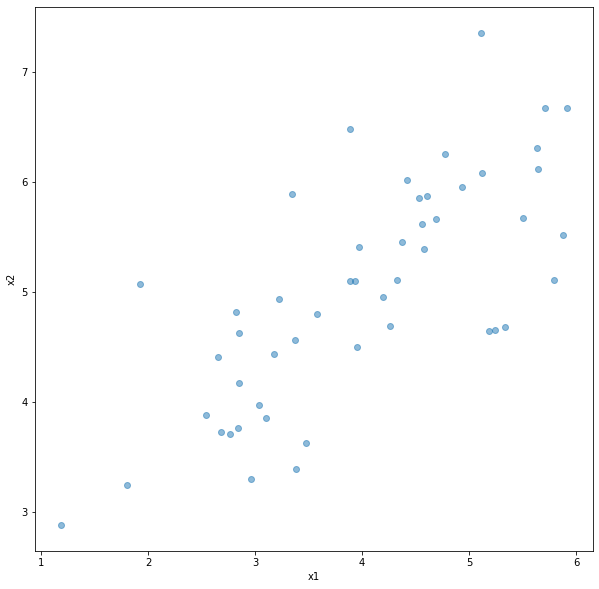

In [116]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(d2_X[:,0], d2_X[:,1], color='C0', alpha=0.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

We must normalise the data in each of its features before calculating its covariance matrix, and from there we can then perform Singular Value Decomposition (SVD) in order to find the eigenvectors (a.k.a. principle components), which will best describe the main directions of data variation. So let's begin with the normalisation:

In [117]:
print(np.mean(d2_X, axis=0))
print(np.std(d2_X, axis=0))
# [3.98926528 5.00280585]
# [1.16126017 1.01312201]

[3.98926528 5.00280585]
[1.16126017 1.01312201]


In [165]:
d2_X_norm = (d2_X - np.mean(d2_X, axis=0)) / np.std(d2_X, axis=0)
print(d2_X[:5])
print(d2_X_norm[:5])
print((3.38156267 - 3.98926528) / 1.16126017)
print((3.38911268 - 5.00280585) / 1.01312201)
# [[3.38156267 3.38911268]
#  [4.52787538 5.8541781 ]
#  [2.65568187 4.41199472]
#  [2.76523467 3.71541365]
#  [2.84656011 4.17550645]]
# [[-0.52331306 -1.59279252]
#  [ 0.46381518  0.84034523]
#  [-1.14839331 -0.58315891]
#  [-1.05405373 -1.27071783]
#  [-0.98402167 -0.81658417]]
# -0.5233130574003929
# -1.5927925304870234

[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]]
[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]]
-0.5233130574003929
-1.5927925304870234


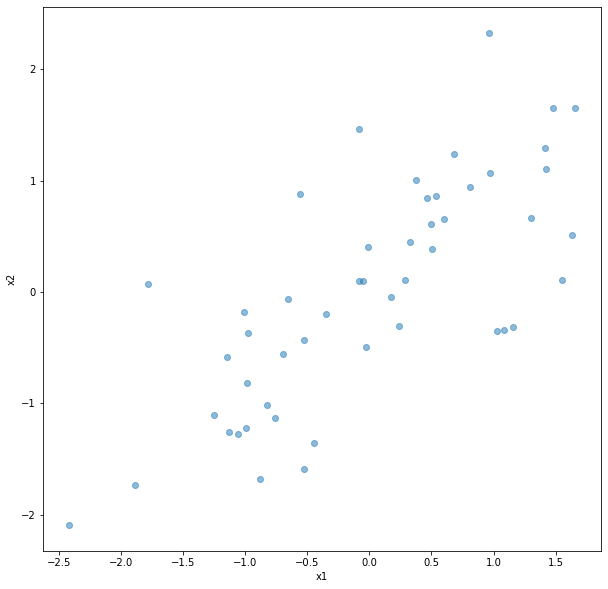

In [119]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(d2_X_norm[:,0], d2_X_norm[:,1], color='C0', alpha=0.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

The covariance matrix is formed by the dot products of each column of normalised data with each other i.e. we sum over the data point index, so giving a square matrix of size equal to the number of features. This is then divided by the number of data points, so in some sense giving mean values of the dot product summations. Furthermore, the covariance matrix of the normalised data is unitary on the leading diagonal, about which it is symetrical. The ultimate meaning of all this is currently outside my knowledge, I can't remember whether or not this was in Sal Khan's linear algebra course, which was the last linear algebra I went through.

In [120]:
d2_X_norm_covmat = (1 / d2_X_norm.shape[0]) * np.dot(np.transpose(d2_X_norm), d2_X_norm)
print(d2_X_norm_covmat.shape)
print(d2_X_norm_covmat)
# (2, 2)
# [[1.         0.73553038]
#  [0.73553038 1.        ]]

(2, 2)
[[1.         0.73553038]
 [0.73553038 1.        ]]


The Singular Value Decomposition (SVD) is now done with a black-box function, not exactly sure what it's doing:

In [121]:
# covmat_svd[0] contains the eigenvectors in the columns, in order of dominance from most to least
# covmat_svd[1] contains the "singular values", I think one per eigenvector. I think the eigenvectors themselves are given normalised (i.e. as unit vectors), and the singular values may be the multiplication factors that give the eigenvectors their relative sizes when not normalised, or something like that.
# covmat_svd[2] contains something else ...

d2_X_norm_covmat_svd = np.linalg.svd(d2_X_norm_covmat)
print(d2_X_norm_covmat_svd[0].shape) # Normalised eigenvectors
print(d2_X_norm_covmat_svd[1].shape)
print(d2_X_norm_covmat_svd[2].shape)
print(d2_X_norm_covmat_svd[0])
print(d2_X_norm_covmat_svd[1])
print(d2_X_norm_covmat_svd[2])
# (2, 2)
# (2,)
# (2, 2)
# [[-0.70710678 -0.70710678]
#  [-0.70710678  0.70710678]]
# [1.73553038 0.26446962]
# [[-0.70710678 -0.70710678]
#  [-0.70710678  0.70710678]]

(2, 2)
(2,)
(2, 2)
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.73553038 0.26446962]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [166]:
print(np.sqrt(np.sum(np.power(d2_X_norm_covmat_svd[0],2), axis=0)))
# [1. 1.]

[1. 1.]


In [123]:
d2_X_norm_eigvecs = d2_X_norm_covmat_svd[0] * d2_X_norm_covmat_svd[1] # Maybe un-normalised eigenvectors, if I'm correct ...
print(d2_X_norm_eigvecs.shape)
print(d2_X_norm_eigvecs)
# (2, 2)
# [[-1.2272053  -0.18700826]
#  [-1.2272053   0.18700826]]

(2, 2)
[[-1.2272053  -0.18700826]
 [-1.2272053   0.18700826]]


In [124]:
# This isn't needed for anything, but note that we can recover covmat from the eigenvectors and
# covmat_svd as follows:

# n.b. The SVD form can be thought of as a "factorised" form of the input matrix
# n.b. Here we have 2x2, but further care must be taken in non-square cases i.e. the following
# isn't general (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

print(np.dot(d2_X_norm_eigvecs, d2_X_norm_covmat_svd[2]))
# [[1.         0.73553038]
#  [0.73553038 1.        ]]

[[1.         0.73553038]
 [0.73553038 1.        ]]


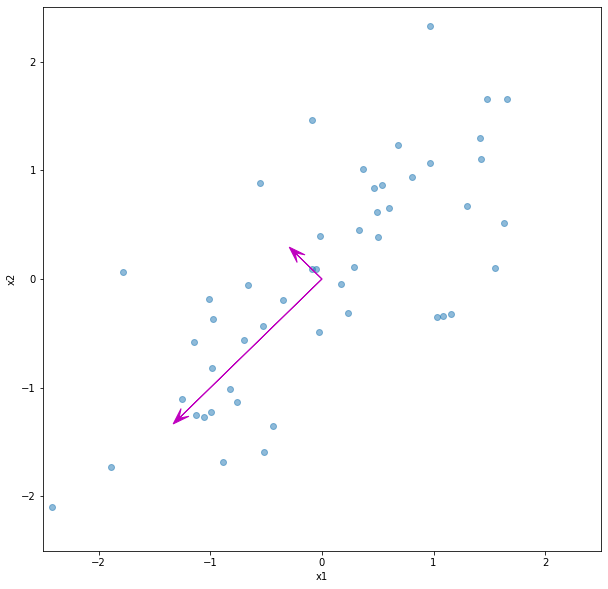

In [125]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(d2_X_norm[:,0], d2_X_norm[:,1], color='C0', alpha=0.5)
for eigvecs_idx in range(d2_X_norm_eigvecs.shape[1]):
    ax.arrow(0, 0, d2_X_norm_eigvecs[0][eigvecs_idx], d2_X_norm_eigvecs[1][eigvecs_idx], color='m', head_width=0.1, overhang=0.5)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

Now get the projections of the data points onto the normalised (unit) eigenvectors, up to whatever dimensionality you want to project to i.e. even though we are dealing with 2D data in this example, the following is general for any dimensionality. We may wish to know the projection of 100D data onto the space defined by the top 50 eigenvectors, for instance. This is the target information that we're after, the dimensionally reduced data. For the case of the 2D example in hand, let's simply project onto the most dominant normalised eigenvector of the two that we have:

In [167]:
d2_k = 1
d2_X_norm_proj = np.dot(d2_X_norm, d2_X_norm_covmat_svd[0][:,:d2_k])
print(d2_X_norm_proj.shape)
# (50, 1)

(50, 1)


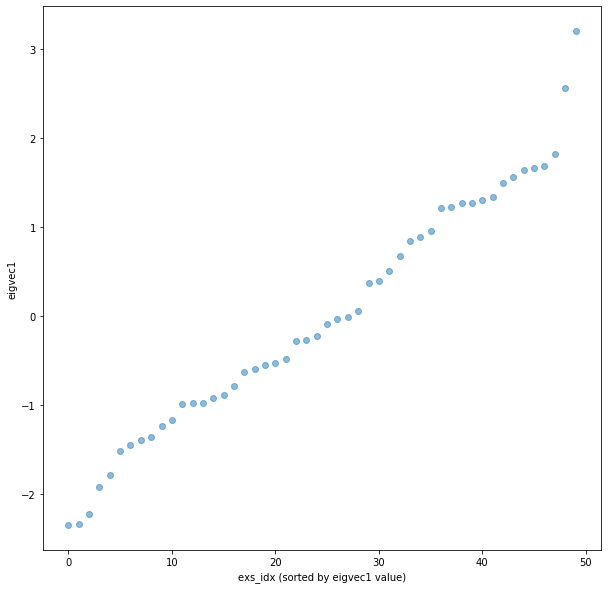

In [168]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(range(d2_X_norm_proj.shape[0]), sorted(d2_X_norm_proj), color='C0', alpha=0.5)
ax.set(xlabel='exs_idx (sorted by eigvec1 value)', ylabel='eigvec1')
plt.show()

---

Just for fun, let's plot the normalised data and their projections onto the scaled eigenvector(s):

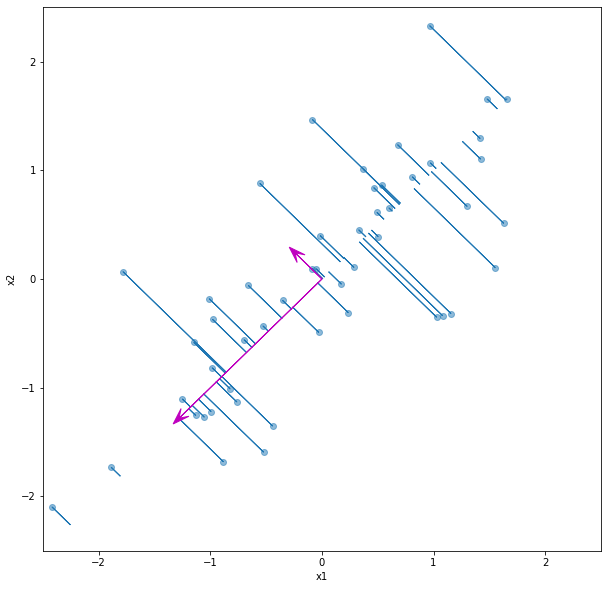

In [128]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(d2_X_norm[:,0], d2_X_norm[:,1], color='C0', alpha=0.5)

# First principle component projections:
for exs_idx,d2_X_norm_ex in enumerate(d2_X_norm):
    ax.arrow(
        d2_X_norm_ex[0],
        d2_X_norm_ex[1],
        d2_X_norm_proj[exs_idx][0] * d2_X_norm_covmat_svd[0][0,0] - d2_X_norm_ex[0],
        d2_X_norm_proj[exs_idx][0] * d2_X_norm_covmat_svd[0][1,0] - d2_X_norm_ex[1],
        color='C0',
    )

# Second principle component projections (available if d2_k=2 was used in the production of d2_X_norm_proj):
# for exs_idx,d2_X_norm_ex in enumerate(d2_X_norm):
#     ax.arrow(
#         d2_X_norm_ex[0],
#         d2_X_norm_ex[1],
#         d2_X_norm_proj[exs_idx][1] * d2_X_norm_covmat_svd[0][0,1] - d2_X_norm_ex[0],
#         d2_X_norm_proj[exs_idx][1] * d2_X_norm_covmat_svd[0][1,1] - d2_X_norm_ex[1],
#         color='C0',
#     )

for eigvecs_idx in range(d2_X_norm_eigvecs.shape[1]):
    ax.arrow(0, 0, d2_X_norm_eigvecs[0][eigvecs_idx], d2_X_norm_eigvecs[1][eigvecs_idx], color='m', head_width=0.1, overhang=0.5)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

If we were to only store the projected data (the 1D positions along the dominant eigenvector in the above) and the eigenvectors themselves (which are each given in terms of the full original data dimensionality), we can only recover an approximation of the original data, as should be expected. The recovered data can only be at positions in feature space that are reachable by a combination of the eigenvectors onto which the original data were projected. So in the present case, we only get back 2D data that are on the dominant eigenvector line itself. The general recovery formula is a dot product of the projected data and the eigenvectors onto which the original data were projected, as each eigenvector gives some contribution to the original feature space i.e. each eigenvector has an x1-component, an x2-component, and so on, and the dot product provides this summation:

In [54]:
d2_X_norm_rec = np.dot(d2_X_norm_proj, np.transpose(d2_X_norm_covmat_svd[0][:,:d2_k]))
print(d2_X_norm_rec.shape)
print(d2_X_norm_rec[0])
# (50, 2)

# [-0.52331306, -1.59279252] with d2_k=2 i.e. recording the same number of principle component
# dimensions as data dimensions can return the exact same data point as original input

# [-1.05805279, -1.05805279] with d2_k=1 i.e. recording fewer principle component dimensions than
# data dimensions cannot return the exact same data point as original input, only combinations of
# the eigenvectors for which we did save projections

# Note that Andrew gets slightly different projection values, not sure if it's an indicator of
# something actually wrong with the above

(50, 2)
[-1.05805279 -1.05805279]


In [130]:
print(d2_X_norm_proj[0].shape)
print(d2_X_norm_rec[0].shape)
print(np.sqrt(np.sum(np.power(d2_X_norm_proj[0],2))))
print(np.sqrt(np.sum(np.power(d2_X_norm_rec[0],2))))
# (1,)
# (2,)
# 1.4963126084578515
# 1.496312608457851

(1,)
(2,)
1.4963126084578515
1.496312608457851


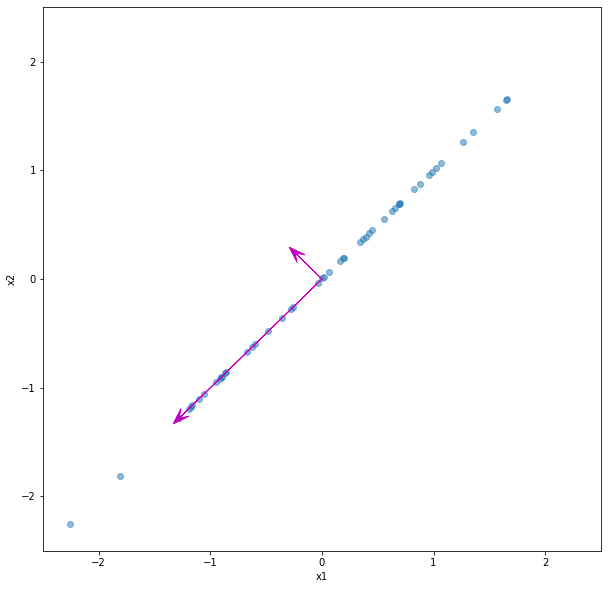

In [132]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(d2_X_norm_rec[:,0], d2_X_norm_rec[:,1], color='C0', alpha=0.5)
for eigvecs_idx in range(d2_X_norm_eigvecs.shape[1]):
    ax.arrow(0, 0, d2_X_norm_eigvecs[0][eigvecs_idx], d2_X_norm_eigvecs[1][eigvecs_idx], color='m', head_width=0.1, overhang=0.5)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set(xlabel='x1', ylabel='x2')
plt.show()

---

In [133]:
print(d2_X.shape)
print(d2_X_norm.shape)
print(d2_X_norm_proj.shape)
print(d2_X_norm_rec.shape)
# (50, 2)
# (50, 2)
# (50, 1)
# (50, 2)

(50, 2)
(50, 2)
(50, 1)
(50, 2)


# Exercise 7.2: Principle Component Analysis (PCA) (dimension-1024)
---

Just as in the k-means section, where we observed the process with simple 2D data before going to more complicated higher dimensional data, we'll now do the same here for PCA. In the above PCA example we had 2D data and so 2D eigenvectors. If we now look at some image data, each pixel can be regarded as a dimension when an image is unrolled into a single-index array, as we also discuss in exercises 3 and 4. Many pixels means many dimensions. The eigenvectors will also have as many dimensions, and each can be rolled back up into some kind of image i.e. we can see all vector components at once in terms of the pixel intensity of the rolled-up vector. As the maths used above was general, the exact same steps can be performed again here with the exact same code: getting normalised data, getting the covariance matrix of the normalised data, getting the SVD of that covariance matrix, and using the eigenvectors within that, typically a subset thereof, to define a space onto which we can project the data examples and get a reduced description of them. And from there we can see what the recovered data look like, expected to be of lower quality than the original data but saving storage space, and, if they were to be used in some further processing, to also save on computation. Let's first have a look at a subset of the input data of 32 $\times$ 32 pixel images, which are given as unrolled greyscale image vectors:

In [134]:
d3 = loadmat('ex7/ex7faces.mat')
d3.keys()
# dict_keys(['__header__', '__version__', '__globals__', 'X'])

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [135]:
d3_X = d3['X']
d3_X.shape
# (5000, 1024)

(5000, 1024)

In [136]:
del(d3)

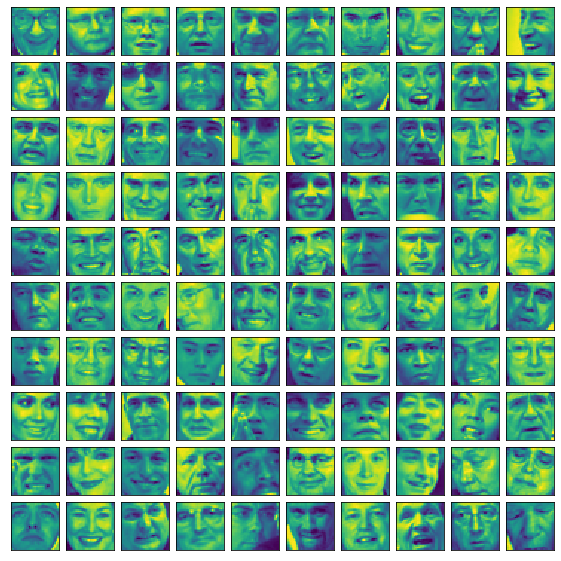

In [137]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (10,10),
    axes_pad = 0.1,
)

ims = [
    np.transpose(np.reshape(d3_X[exs_idx], [32,32]))
    for exs_idx in range(100)
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

---

Now let's normalise the data and have another look:

In [138]:
d3_X_norm = (d3_X - np.mean(d3_X, axis=0)) / np.std(d3_X, axis=0)

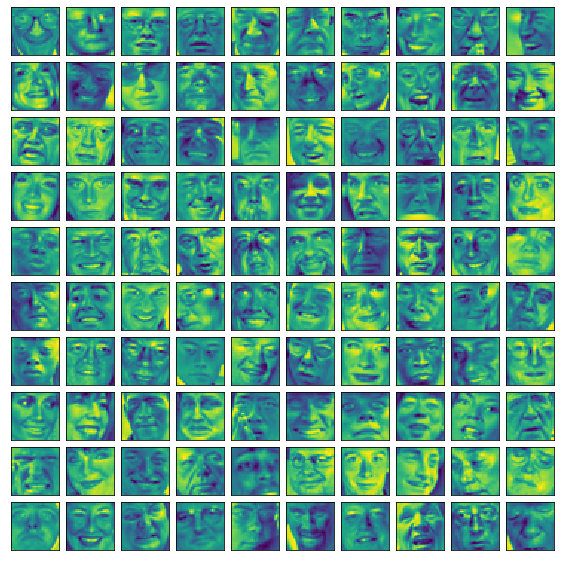

In [139]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (10,10),
    axes_pad = 0.1,
)

ims = [
    np.transpose(np.reshape(d3_X_norm[exs_idx], [32,32]))
    for exs_idx in range(100)
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

There's no loss of detail compared to the original data, only a shift of the contrast spectrum.

---

Moving straight on to the covariance matrix, the SVD, and the eigenvectors, we have the following, again just following the same procedure as with the previous 2D example:

In [140]:
d3_X_norm_covmat = (1 / d3_X_norm.shape[0]) * np.dot(np.transpose(d3_X_norm), d3_X_norm)
print(d3_X_norm_covmat.shape)
print(d3_X_norm_covmat[:5,:5])
# (1024, 1024)
# [[1.         0.97763926 0.92613466 0.86377951 0.81096319]
#  [0.97763926 1.         0.97308727 0.91485037 0.85943261]
#  [0.92613466 0.97308727 1.         0.97301338 0.91849176]
#  [0.86377951 0.91485037 0.97301338 1.         0.9710811 ]
#  [0.81096319 0.85943261 0.91849176 0.9710811  1.        ]]

(1024, 1024)
[[1.         0.97763926 0.92613466 0.86377951 0.81096319]
 [0.97763926 1.         0.97308727 0.91485037 0.85943261]
 [0.92613466 0.97308727 1.         0.97301338 0.91849176]
 [0.86377951 0.91485037 0.97301338 1.         0.9710811 ]
 [0.81096319 0.85943261 0.91849176 0.9710811  1.        ]]


In [141]:
d3_X_norm_covmat_svd = np.linalg.svd(d3_X_norm_covmat)
print(d3_X_norm_covmat_svd[0].shape) # Normalised eigenvectors
print(d3_X_norm_covmat_svd[1].shape)
print(d3_X_norm_covmat_svd[2].shape)
print(d3_X_norm_covmat_svd[0][:5,:5])
print(d3_X_norm_covmat_svd[1][:5])
print(d3_X_norm_covmat_svd[2][:5,:5])
# (1024, 1024)
# (1024,)
# (1024, 1024)
# [[-0.01425307 -0.03606596 -0.04561884  0.03357392 -0.00801162]
#  [-0.01474233 -0.03809858 -0.04756249  0.03342374 -0.00709208]
#  [-0.01501482 -0.03988747 -0.05082085  0.03325487 -0.00481185]
#  [-0.01530126 -0.0413843  -0.0532679   0.03165395 -0.00163999]
#  [-0.01551086 -0.04315243 -0.05554805  0.02964045  0.00097106]]
# [337.02502183 130.93879726  54.69353175  39.72989611  33.16261683]
# [[-0.01425307 -0.01474233 -0.01501482 -0.01530126 -0.01551086]
#  [-0.03606596 -0.03809858 -0.03988747 -0.0413843  -0.04315243]
#  [-0.04561884 -0.04756249 -0.05082085 -0.0532679  -0.05554805]
#  [ 0.03357392  0.03342374  0.03325487  0.03165395  0.02964045]
#  [-0.00801162 -0.00709208 -0.00481185 -0.00163999  0.00097106]]

(1024, 1024)
(1024,)
(1024, 1024)
[[-0.01425307 -0.03606596 -0.04561884  0.03357392 -0.00801162]
 [-0.01474233 -0.03809858 -0.04756249  0.03342374 -0.00709208]
 [-0.01501482 -0.03988747 -0.05082085  0.03325487 -0.00481185]
 [-0.01530126 -0.0413843  -0.0532679   0.03165395 -0.00163999]
 [-0.01551086 -0.04315243 -0.05554805  0.02964045  0.00097106]]
[337.02502183 130.93879726  54.69353175  39.72989611  33.16261683]
[[-0.01425307 -0.01474233 -0.01501482 -0.01530126 -0.01551086]
 [-0.03606596 -0.03809858 -0.03988747 -0.0413843  -0.04315243]
 [-0.04561884 -0.04756249 -0.05082085 -0.0532679  -0.05554805]
 [ 0.03357392  0.03342374  0.03325487  0.03165395  0.02964045]
 [-0.00801162 -0.00709208 -0.00481185 -0.00163999  0.00097106]]


In [142]:
print(np.sqrt(np.sum(np.power(d3_X_norm_covmat_svd[0],2), axis=0)))
# [1. 1. 1. ... 1. 1. 1.]

[1. 1. 1. ... 1. 1. 1.]


In [143]:
d3_X_norm_eigvecs = d3_X_norm_covmat_svd[0] * d3_X_norm_covmat_svd[1] # Maybe un-normalised eigenvectors, if I'm correct ...
print(d3_X_norm_eigvecs.shape)
print(d3_X_norm_eigvecs[:5,:5])
# (1024, 1024)
# [[-4.80363977 -4.72243347 -2.49505525  1.33388831 -0.26568618]
#  [-4.96853544 -4.9885817  -2.60136056  1.32792185 -0.23519181]
#  [-5.06037043 -5.22281756 -2.77957151  1.32121273 -0.15957363]
#  [-5.15690893 -5.41881039 -2.91340946  1.25760811 -0.05438627]
#  [-5.2275473  -5.65032764 -3.03811928  1.17761185  0.03220296]]

(1024, 1024)
[[-4.80363977 -4.72243347 -2.49505525  1.33388831 -0.26568618]
 [-4.96853544 -4.9885817  -2.60136056  1.32792185 -0.23519181]
 [-5.06037043 -5.22281756 -2.77957151  1.32121273 -0.15957363]
 [-5.15690893 -5.41881039 -2.91340946  1.25760811 -0.05438627]
 [-5.2275473  -5.65032764 -3.03811928  1.17761185  0.03220296]]


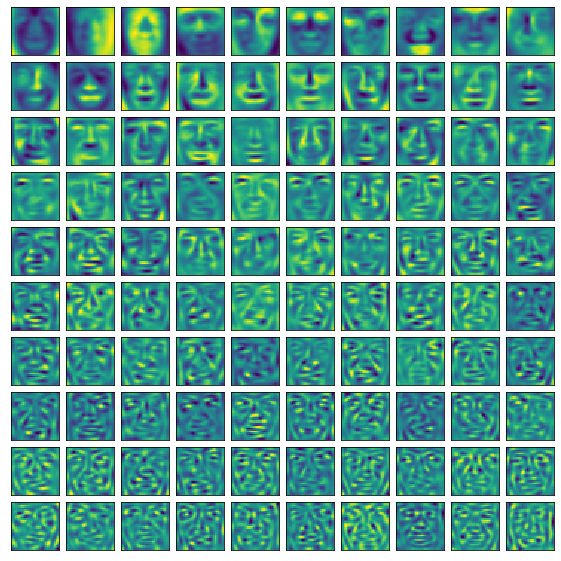

In [144]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (10,10),
    axes_pad = 0.1,
)

ims = [
    np.transpose(np.reshape(d3_X_norm_eigvecs.transpose()[eigvecs_idx], [32,32]))
    for eigvecs_idx in range(100)
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

Just as with the 2D data, the eigenvectors of this higher dimensional dataset describe a basis out of which we may construct any point in the data-space, which in this case would be a face image. We see that going from more to less dominant eigenvectors we go from more to less dominant facial features, catering for all sorts of angles too.

---

Even though we only displayed 100 eigenvector images above, there are actually 1024 of them. However, let's choose to use those most dominant 100 ones seen as the sub-space onto which we will project the normalised image data. As before in the 2D case, this is the target information, the dimensionally reduced data. Even though they may not look like it, the images below are descriptions of the first 100 images in terms of the first 100 eigenvectors, each of the 100 pixels representing how much of each eigenvector is found in each image:

In [145]:
d3_k = 100
d3_X_norm_proj = np.dot(d3_X_norm, d3_X_norm_covmat_svd[0][:,:d3_k])
print(d3_X_norm_proj.shape)
# (5000, 100)

(5000, 100)


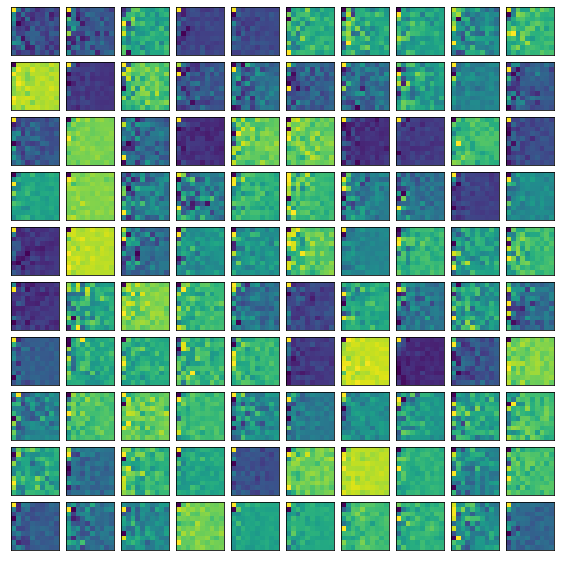

In [146]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (10,10),
    axes_pad = 0.1,
)

ims = [
    np.transpose(np.reshape(d3_X_norm_proj[exs_idx], [10,10]))
    for exs_idx in range(100)
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

---

Finally, let's have a look at the images that we can recover from the dimensionally reduced 100D descriptions, cast back out to 1024D via the subset of the 1024D eigenvectors that we projected onto. Again, just as with the 2D data, the output here will be a limited view of what we started with, here seen as a reduction of facial detail, which corresponds to higher eigenvectors that were truncated:

In [147]:
d3_X_norm_rec = np.dot(d3_X_norm_proj, np.transpose(d3_X_norm_covmat_svd[0][:,:d3_k]))
print(d3_X_norm_rec.shape)
print(d3_X_norm_rec[0])
# (5000, 1024)
# [-0.24050631 -0.26139662 -0.30137928 ... -0.54852901 -0.25372376
#   0.00390558]

(5000, 1024)
[-0.24050631 -0.26139662 -0.30137928 ... -0.54852901 -0.25372376
  0.00390558]


In [148]:
print(d3_X_norm_proj[0].shape)
print(d3_X_norm_rec[0].shape)
print(np.sqrt(np.sum(np.power(d3_X_norm_proj[0],2))))
print(np.sqrt(np.sum(np.power(d3_X_norm_rec[0],2))))
# (100,)
# (1024,)
# 24.764468517259967
# 24.76446851725997

(100,)
(1024,)
24.764468517259967
24.76446851725997


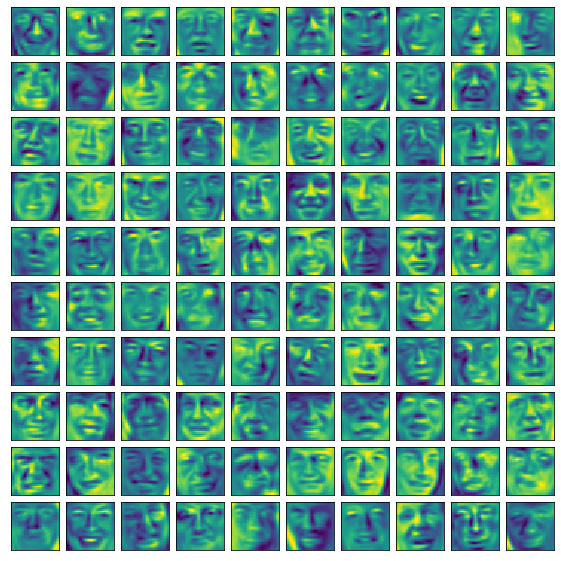

In [149]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (10,10),
    axes_pad = 0.1,
)

ims = [
    np.transpose(np.reshape(d3_X_norm_rec[exs_idx], [32,32]))
    for exs_idx in range(100)
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

---

We can plot the original normalised data and the recovered normalised data side-by-side for a few examples, to better see the compression effect:

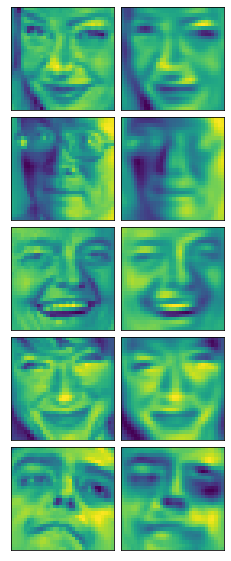

In [150]:
fig = plt.figure(figsize=(10,10))

axs = ImageGrid(
    fig,
    111,
    nrows_ncols = (5,2),
    axes_pad = 0.1,
)

ims = [
    [
        np.transpose(np.reshape(d3_X_norm[exs_idx], [32,32])),
        np.transpose(np.reshape(d3_X_norm_rec[exs_idx], [32,32])),
    ]
    for exs_idx in np.random.choice(d3_X_norm.shape[0], 5, replace=False)
]

ims = [
    im
    for imset in ims
    for im in imset
]

for ax,im in zip(axs, ims):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(im)

plt.show()

---

In [151]:
print(d3_X.shape)
print(d3_X_norm.shape)
print(d3_X_norm_proj.shape)
print(d3_X_norm_rec.shape)
# (5000, 1024)
# (5000, 1024)
# (5000, 100)
# (5000, 1024)

(5000, 1024)
(5000, 1024)
(5000, 100)
(5000, 1024)


# Exercise 7.2: Principle Component Analysis (PCA) (dimension-3)
---

Now let's go back to the k-means clustering of the bird picture, which we saw looked as follows in RGB space for the full data set, with data points coloured according to their assigned centroid colours:

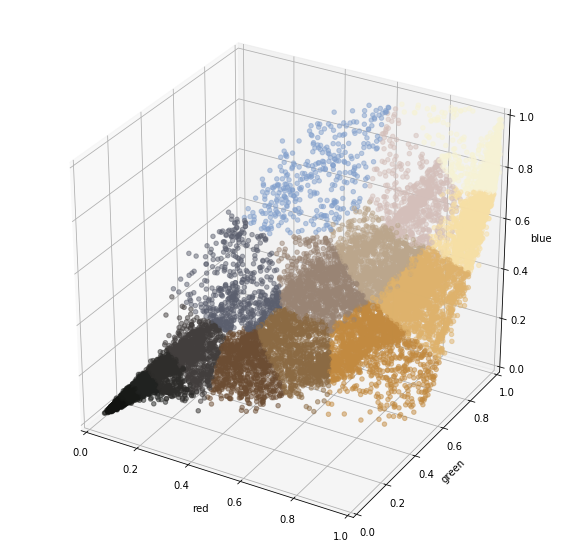

In [76]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(im1_X_reshape[:,0], im1_X_reshape[:,1], im1_X_reshape[:,2], color=im1_X_reshape_lowres, alpha=0.5)
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

---

We can bring this earlier k-means work and the later PCA work together, by now taking this 3D data set and finding a 2D projection via PCA. We just go through the PCA steps again: normalise, covariance matrix, SVD, project:

In [77]:
im1_X_reshape_norm = (im1_X_reshape - np.mean(im1_X_reshape, axis=0)) / np.std(im1_X_reshape, axis=0)

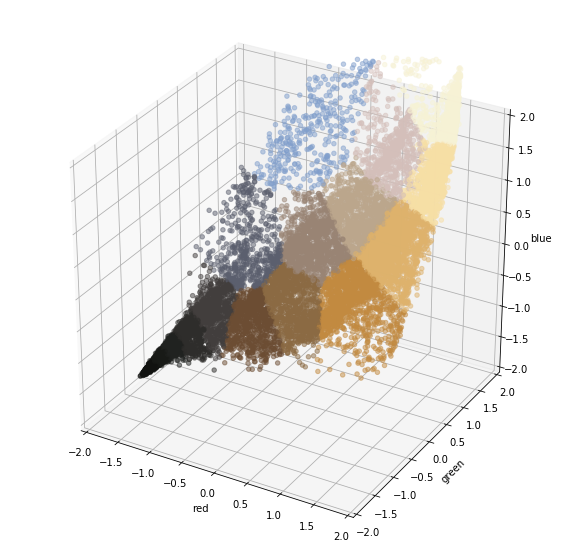

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(im1_X_reshape_norm[:,0], im1_X_reshape_norm[:,1], im1_X_reshape_norm[:,2], color=im1_X_reshape_lowres, alpha=0.5)
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-2.0, 2.0)
ax.set_zlim(-2.0, 2.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

---

In [152]:
im1_X_reshape_norm_covmat = (1 / im1_X_reshape_norm.shape[0]) * np.dot(np.transpose(im1_X_reshape_norm), im1_X_reshape_norm)
print(im1_X_reshape_norm_covmat.shape)
print(im1_X_reshape_norm_covmat)
# (3, 3)
# [[1.000006   0.95750546 0.76874226]
#  [0.95750546 0.99998593 0.88115096]
#  [0.76874226 0.88115096 1.000002  ]]

(3, 3)
[[1.000006   0.95750546 0.76874226]
 [0.95750546 0.99998593 0.88115096]
 [0.76874226 0.88115096 1.000002  ]]


In [153]:
im1_X_reshape_norm_covmat_svd = np.linalg.svd(im1_X_reshape_norm_covmat)
print(im1_X_reshape_norm_covmat_svd[0].shape) # Normalised eigenvectors
print(im1_X_reshape_norm_covmat_svd[1].shape)
print(im1_X_reshape_norm_covmat_svd[2].shape)
print(im1_X_reshape_norm_covmat_svd[0])
print(im1_X_reshape_norm_covmat_svd[1])
print(im1_X_reshape_norm_covmat_svd[2])
# (3, 3)
# (3,)
# (3, 3)
# [[-0.57543665  0.6005476   0.5551714 ]
#  [-0.5986477   0.15320319 -0.78622496]
#  [-0.55721956 -0.7847747   0.27135772]]
# [2.7405393  0.23970553 0.01974905]
# [[-0.57543665 -0.5986477  -0.55721956]
#  [ 0.6005476   0.15320319 -0.7847747 ]
#  [ 0.5551714  -0.78622496  0.27135772]]

(3, 3)
(3,)
(3, 3)
[[-0.57543665  0.6005476   0.5551714 ]
 [-0.5986477   0.15320319 -0.78622496]
 [-0.55721956 -0.7847747   0.27135772]]
[2.7405393  0.23970553 0.01974905]
[[-0.57543665 -0.5986477  -0.55721956]
 [ 0.6005476   0.15320319 -0.7847747 ]
 [ 0.5551714  -0.78622496  0.27135772]]


In [154]:
print(np.sqrt(np.sum(np.power(im1_X_reshape_norm_covmat_svd[0],2), axis=0)))
# [1. 1. 1.]

[1. 1. 1.]


In [155]:
im1_X_reshape_norm_eigvecs = im1_X_reshape_norm_covmat_svd[0] * im1_X_reshape_norm_covmat_svd[1] # Maybe un-normalised eigenvectors, if I'm correct ...
print(im1_X_reshape_norm_eigvecs.shape)
print(im1_X_reshape_norm_eigvecs)
# (3, 3)
# [[-1.5770068   0.14395459  0.0109641 ]
#  [-1.6406176   0.03672365 -0.01552719]
#  [-1.5270821  -0.18811484  0.00535906]]

(3, 3)
[[-1.5770068   0.14395459  0.0109641 ]
 [-1.6406176   0.03672365 -0.01552719]
 [-1.5270821  -0.18811484  0.00535906]]


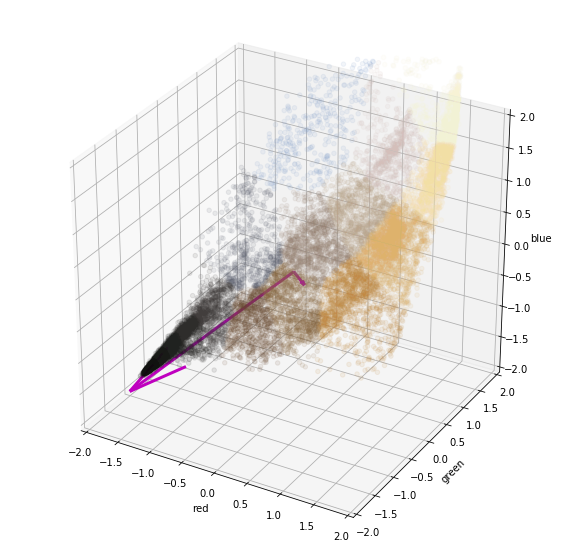

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
# Note that the opacity has been reduced here in order to see the eigenvectors properly:
ax.scatter(im1_X_reshape_norm[:,0], im1_X_reshape_norm[:,1], im1_X_reshape_norm[:,2], color=im1_X_reshape_lowres, alpha=0.1)
for eigvecs_idx in range(im1_X_reshape_norm_eigvecs.shape[1]):
    ax.quiver(
        0, 0, 0,
        im1_X_reshape_norm_eigvecs[0][eigvecs_idx] - 0, im1_X_reshape_norm_eigvecs[1][eigvecs_idx] - 0, im1_X_reshape_norm_eigvecs[2][eigvecs_idx] - 0,
        color='m',
        lw=3,
    )
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-2.0, 2.0)
ax.set_zlim(-2.0, 2.0)
ax.set(xlabel='red', ylabel='green', zlabel='blue')
plt.show()

---

In [156]:
im1_k = 2
im1_X_reshape_norm_proj = np.dot(im1_X_reshape_norm, im1_X_reshape_norm_covmat_svd[0][:,:im1_k])
print(im1_X_reshape_norm_proj.shape)
# (16384, 2)

(16384, 2)


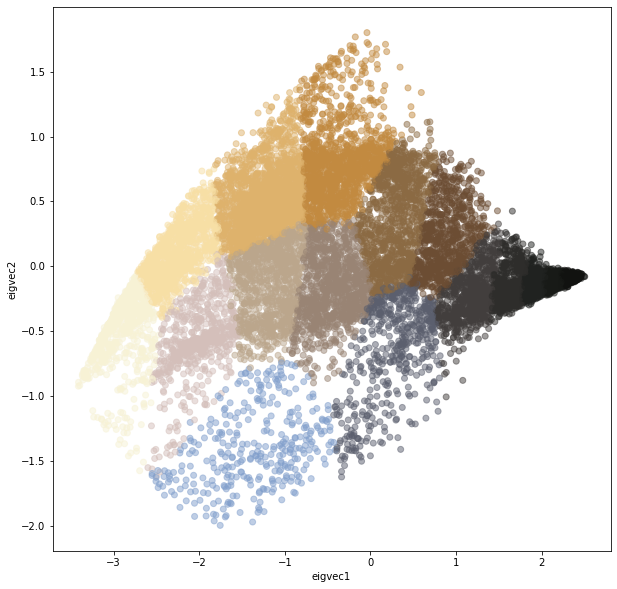

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(im1_X_reshape_norm_proj[:,0], im1_X_reshape_norm_proj[:,1], color=im1_X_reshape_lowres, alpha=0.5)
ax.set(xlabel='eigvec1', ylabel='eigvec2')
plt.show()

This isn't intended to be a method by which we can compress the image further, it just serves as an example of projecting 3D data into a 2D representation. In complexity it therefore sits between the first PCA example (2D to 1D) and the second PCA example (1024D to 100D).